<a href="https://colab.research.google.com/github/BhanuDanda/ADM/blob/main/Assignment-6(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

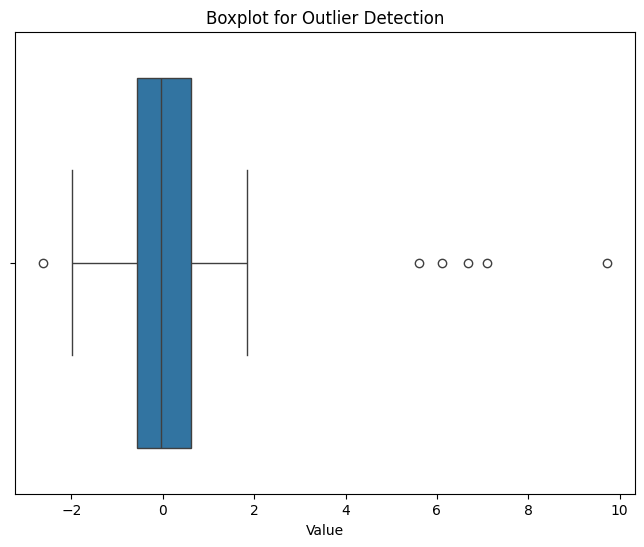

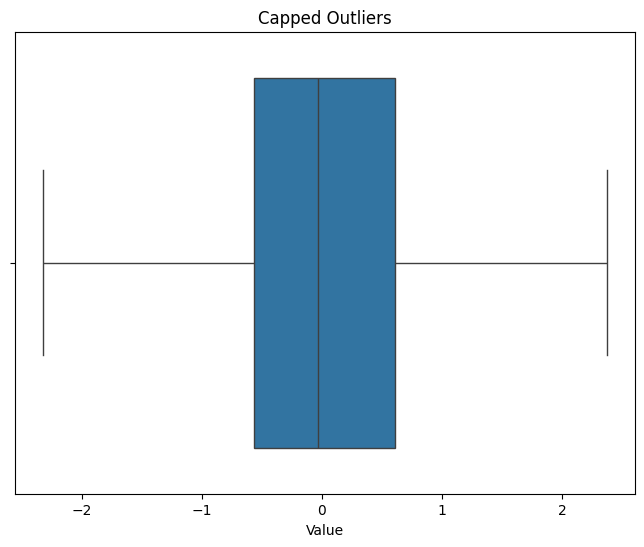

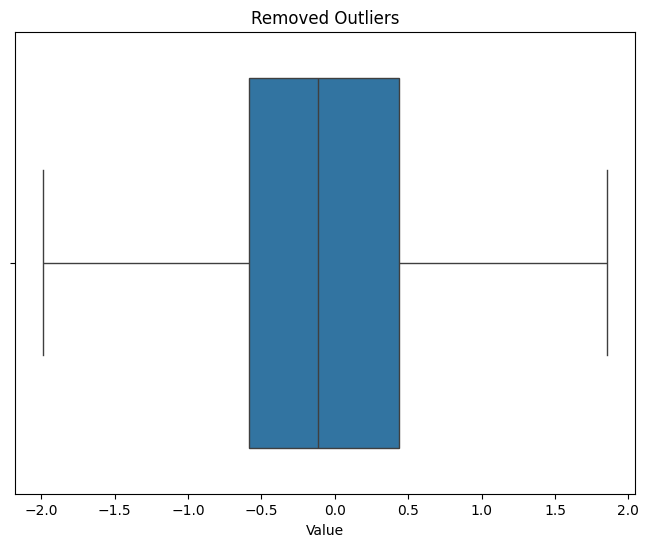

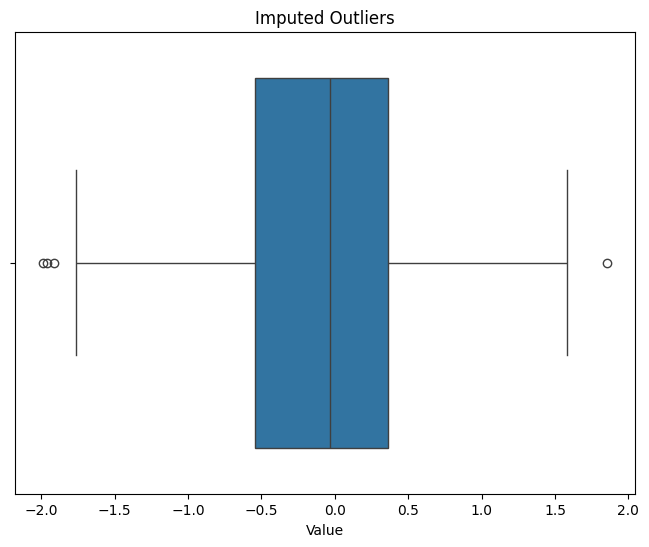

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Create a synthetic dataset
np.random.seed(42)
data = np.random.normal(0, 1, 100)  # Normal distribution
outliers = np.random.uniform(5, 10, 5)  # Artificial outliers
data_with_outliers = np.concatenate([data, outliers])
# Convert to DataFrame
df = pd.DataFrame(data_with_outliers, columns=['Value'])
# Step 1: Detect Outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identifying outliers based on IQR
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] >
upper_bound)]
# Step 2: Detect Outliers using Z-Score method
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]
# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()
# Step 4: Handle Outliers
# Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)
# Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]
# Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])
# Step 5: Visualize handled data
# Capped data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()
# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()

In [15]:
# Importing
import sklearn
from sklearn.datasets import fetch_openml # changed from titanic to fetch_openml
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
titanic = fetch_openml(name='titanic', version=1, as_frame=True, parser='auto') # changed from load_titanic() to fetch_openml() and added parameters

# Create the dataframe
df_titanic = titanic.data
df_titanic.columns = titanic.feature_names # if you want to rename the columns with feature names
print(df_titanic.head())

   pclass                                             name     sex      age  \
0       1                    Allen, Miss. Elisabeth Walton  female  29.0000   
1       1                   Allison, Master. Hudson Trevor    male   0.9167   
2       1                     Allison, Miss. Helen Loraine  female   2.0000   
3       1             Allison, Mr. Hudson Joshua Creighton    male  30.0000   
4       1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000   

   sibsp  parch  ticket      fare    cabin embarked boat   body  \
0      0      0   24160  211.3375       B5        S    2    NaN   
1      1      2  113781  151.5500  C22 C26        S   11    NaN   
2      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal

<Axes: ylabel='fare'>

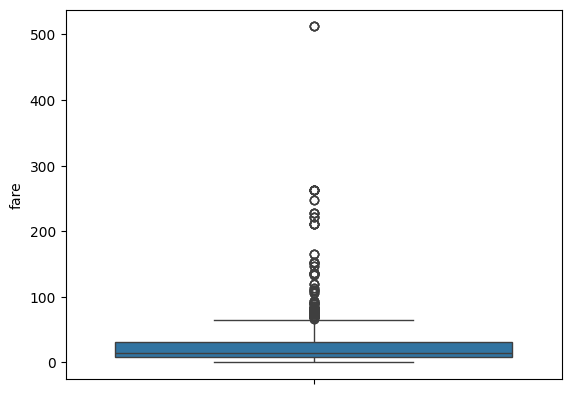

In [23]:
# Box Plot
import seaborn as sns
sns.boxplot(df_titanic['fare'])

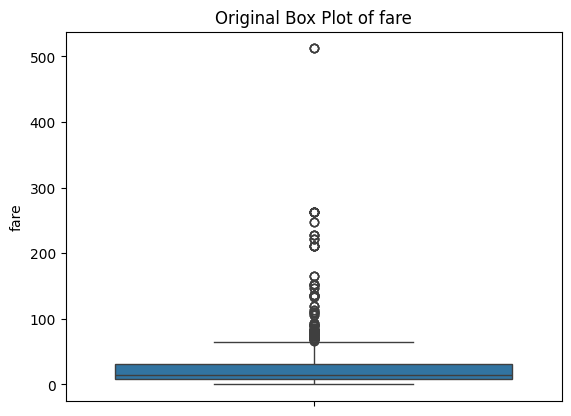

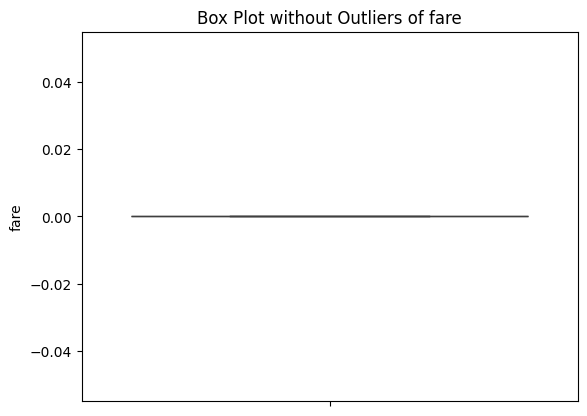

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_titanic, 'fare', threshold_value)